<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Superintelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [3]:
import gym   # Import OpenAI Gym repository
import numpy as np
import pandas as pd
np.random.seed(100)

In [26]:
env = gym.make('CartPole-v0')
env

<TimeLimit<CartPoleEnv<CartPole-v0>>>

In [5]:
env.seed(100)

[100]

In [33]:
spec=gym.spec('CartPole-v0')
spec.max_episode_steps

200

action_size = env.action_space.n
action_size

In [35]:
[env.action_space.sample() for _ in range(10)]

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1]

In [8]:
state_size = env.observation_space.shape[0]
state_size

4

In [9]:
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

array([-0.01628537,  0.02379786, -0.0391981 , -0.01476447], dtype=float32)

In [10]:
state, reward, done, _ = env.step(env.action_space.sample())
state, reward, done, _

(array([-0.01580941,  0.2194594 , -0.03949339, -0.31955263], dtype=float32),
 1.0,
 False,
 {})

# Start gathering data for training of the neural network (ONlY data resulting from games with total reard of 110 and more)

In [72]:
%%time
data = pd.DataFrame()
state = env.reset()  # Already done in upper cells 
length = []
a=0
for run in range(25000):
    done = False
    prev_state = env.reset()
    treward = 1        
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110:
        data = data.append(pd.DataFrame(results))
        length.append(treward)

Wall time: 15.1 s


In [73]:
np.array(length).mean()

116.0

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 109
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      580 non-null    float32
 1   s2      580 non-null    float32
 2   s3      580 non-null    float32
 3   s4      580 non-null    float32
 4   a       580 non-null    int64  
 5   r       580 non-null    float64
dtypes: float32(4), float64(1), int64(1)
memory usage: 22.7 KB


In [75]:
data.tail()

,s1,s2,s3,s4,a,r
105,0.219745,-0.613757,0.159477,0.682637,1,1.0
106,0.207470,-0.421166,0.173130,0.444105,0,1.0
107,0.199047,-0.618261,0.182012,0.785973,1,1.0
108,0.186681,-0.426044,0.197732,0.555627,1,1.0
109,0.178161,-0.234167,0.208844,0.331175,1,1.0


# Now, Training of the Neural Network follows

In [76]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [77]:
import tensorflow as tf
tf.random.set_seed(100)

In [78]:
from keras.layers import Dense
from keras.models import Sequential

In [79]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))    # A model Neural Network with ONLY one hidden layer is used. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [80]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

Wall time: 2.73 s


In [81]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.633964,0.62931,0.628468,0.672414
23,0.633277,0.62069,0.626863,0.672414
24,0.632353,0.62069,0.629507,0.637931


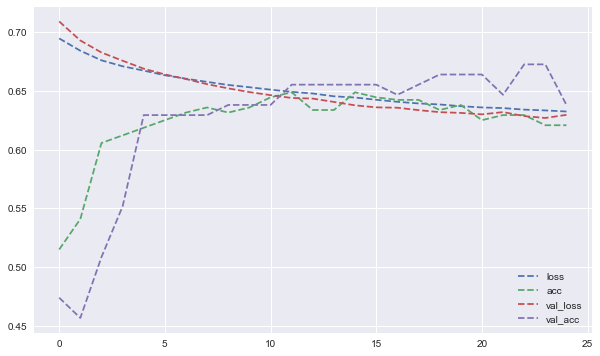

In [82]:
res.plot(figsize=(10, 6), style='--');

In [83]:
def epoch():
    done = False
    state = env.reset()
    treward = 1
    while not done:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [84]:
epoch()

172.0

In [85]:
%time res = np.array([epoch() for _ in range(100)])
res

Wall time: 18min 34s


array([200., 200., 200., 163., 200., 200., 200., 183., 200., 200., 200.,
       200., 198., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 192., 200., 200.,
       200., 200., 200., 177., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 193., 200., 200.,
       200., 200., 200., 200., 193., 200., 200., 200., 200., 200., 200.,
       200., 175., 200., 200., 200., 179., 200., 200., 200., 200., 200.,
       200.])

In [ ]:
res.mean()

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>